# Set Up and libraries

In [4]:
%%capture
!wget https://www.dropbox.com/scl/fi/6u1yfcnnf4jqmhedx519u/Reviews.csv?rlkey=xqmvvohkq0i0k7hho79fs43b6&st=mexudbu2&dl=0
!mv Reviews.csv?rlkey=xqmvvohkq0i0k7hho79fs43b6 reviews.csv

In [5]:
!wget https://www.dropbox.com/scl/fi/2o3fmzj4jdsfujfhu0mns/reviews.zip?rlkey=yc8doasvaavp2993huknxw6jt&st=3e3bpy5q&dl=0

--2024-11-07 12:16:19--  https://www.dropbox.com/scl/fi/2o3fmzj4jdsfujfhu0mns/reviews.zip?rlkey=yc8doasvaavp2993huknxw6jt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2d553641c4fbb7759fd7c9c003.dl.dropboxusercontent.com/cd/0/inline/Cd5_c5LouGrrpsQmh47peivJV7yX0nhqM4a5nCbu0LxZQMrtwb1gjhIH-fUwcc4ListHKzodUX0Mg0mFtALNXwohMS8wfhuSx1Pb9tJhBTJ62AO6AldM9uYhBZJDYoyqUzpBBdEQ5kMxEC33Ro9MNFYi/file# [following]
--2024-11-07 12:16:20--  https://uc2d553641c4fbb7759fd7c9c003.dl.dropboxusercontent.com/cd/0/inline/Cd5_c5LouGrrpsQmh47peivJV7yX0nhqM4a5nCbu0LxZQMrtwb1gjhIH-fUwcc4ListHKzodUX0Mg0mFtALNXwohMS8wfhuSx1Pb9tJhBTJ62AO6AldM9uYhBZJDYoyqUzpBBdEQ5kMxEC33Ro9MNFYi/file
Resolving uc2d553641c4fbb7759fd7c9c003.dl.dropboxusercontent.com (uc2d553641c4fbb7759fd7c9c003.dl.dropboxusercontent.com)... 162.125.5.15, 2620:10

In [6]:
!mv reviews.zip?rlkey=yc8doasvaavp2993huknxw6jt reviews.zip
!unzip reviews.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: reviews/Texas/0x86468126f8349b13:0x1efb8609e6a3be12.png  
  inflating: reviews/Texas/0x864c2f0ec3c9bff3:0xcaa42072587d2706.png  
  inflating: reviews/Texas/0x864733869035a721:0x3710527b9de1bcec.png  
  inflating: reviews/Texas/0x8640d88f9ca9e3f3:0x51bf9baf2f9f8a52.png  
  inflating: reviews/Texas/0x86fbd95a6fb08163:0xe071bb594ee083e7.png  
  inflating: reviews/Texas/0x865c8a2c4f0c0ca1:0x346a7e9b477d367c.png  
  inflating: reviews/Texas/0x8640d30af82c762f:0x87d78eea37c481df.png  
  inflating: reviews/Texas/0x865cf539a4b5a817:0xf4846f70f3e386c5.png  
  inflating: reviews/Texas/0x863931237e58711d:0x96c04364a69dde86.png  
  inflating: reviews/Texas/0x864e771a27e01db1:0xaf3016c9927dee99.png  
  inflating: reviews/Texas/0x86454b89b3b880d1:0x41995b3478339257.png  
  inflating: reviews/Texas/0x8640bd41a808386b:0x26b29808ab077659.png  
  inflating: reviews/Texas/0x86ddfff459d1a093:0x5c36841e89042ff7.png  
  inflatin

In [7]:
%%capture
!pip install pyreclab
!pip install cornac

In [63]:
import pandas as pd
import numpy as np
import json
import gzip
import pyreclab
import random
from sklearn.model_selection import train_test_split
import scipy.sparse as sparse
import os
# images
from keras.applications import vgg16, vgg19, ResNet50
from tensorflow.keras.utils import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
# text
import requests
import heapq
import math
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from io import BytesIO
import pickle
import time
# cornac
import cornac
from cornac.data import Reader, Dataset
import cornac.datasets
from cornac.eval_methods import RatioSplit
from cornac.data import TextModality, ImageModality
from cornac.data.text import BaseTokenizer
from cornac.models import PMF, SoRec, WMF, CTR, BPR, VBPR
import torch



# Data Preprocessing

In [9]:
df = pd.read_csv('reviews.csv')
print(df.shape)

count_per_state = df['state'].value_counts()
for state, count in count_per_state.items():
    folder_size = len(os.listdir(f'reviews/{state}'))
    print(f"State: {state}, Count: {count}")
    print(f"Folder size {folder_size}")
    if folder_size >= count:
        print('- Se encuentran todas las imagenes => No hay conflictos\n')
    else:
        print('- Hay que eliminar imagenes => Conflicto\n')
        for row in df.itertuples():
            img_filename = row.img_filename
            path = f'{row.gmap_id}.png'
            state = row.state
            if path not in os.listdir(f'reviews/{state}'):
                print(row)


print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())


(8334, 7)
State: Virginia, Count: 2881
Folder size 2948
- Se encuentran todas las imagenes => No hay conflictos

State: California, Count: 1775
Folder size 1775
- Se encuentran todas las imagenes => No hay conflictos

State: Texas, Count: 1134
Folder size 1134
- Se encuentran todas las imagenes => No hay conflictos

State: Hawaii, Count: 984
Folder size 984
- Se encuentran todas las imagenes => No hay conflictos

State: Florida, Count: 912
Folder size 912
- Se encuentran todas las imagenes => No hay conflictos

State: North_Dakota, Count: 648
Folder size 678
- Se encuentran todas las imagenes => No hay conflictos

user_id           0
gmap_id           0
rating            0
text              0
img_url           0
img_filename    296
state             0
dtype: int64
user_id         0
gmap_id         0
rating          0
text            0
img_url         0
img_filename    0
state           0
dtype: int64


In [10]:
df_uir = df[['user_id', 'gmap_id', 'rating']]

In [58]:
X_train, X_test = train_test_split(df_uir, test_size=0.2, random_state=42)

In [12]:
print('Se cumple?',X_test.shape[0] + X_train.shape[0] == df_uir.shape[0])

Se cumple? True


In [13]:
X_test.shape, X_train.shape

((1608, 3), (6430, 3))

In [14]:
X_train.to_csv('reviews_train.csv', index=False)
X_test.to_csv('reviews_test.csv', index=False)

# Models

## Most popular

In [ ]:
model_mp = pyreclab.MostPopular(
    dataset= 'reviews_train.csv',
    header = True,
    usercol = 0,
    itemcol = 1,
    ratingcol = 2
)

In [ ]:
model_mp.train(progress=True)

In [ ]:
reclist, map, ndcg = model_mp.testrec(
    input_file = 'reviews_test.csv',
    header = True,
    usercol = 0,
    itemcol = 1,
    ratingcol = 2,
    topn = 10,
    output_file = 'results.csv',
    relevance_threshold = 3.5,
    includeRated = False
)

In [ ]:
def find_user(user_id):
    for review in reviews:
        review_uid = review['user_id']
        if review_uid != user_id: continue
        user_name = review['name']
        return user_name


In [ ]:
users = list(reclist.keys())
user_1 = random.choice(users)
user_name = find_user(user_1)
user_reclist = reclist[user_1]
print(user_name)

Alana Nedelko


### Ejemplo

In [ ]:
def show_recommendations(user, reclist):
    rec_business_cols = {
        'name' : [],
        'description' : [],
        'url' : [],
        'categories': []

    }
    for d in metadata:
        if d['gmap_id'] not in reclist: continue
        categories = ", ".join(d['category'])

        rec_business_cols['name'].append(d['name'])
        rec_business_cols['description'].append(d['description'])
        rec_business_cols['url'].append(d['url'])

        rec_business_cols['categories'].append(categories)

    reclist_df = pd.DataFrame(rec_business_cols)
    return reclist_df

In [ ]:
show_recommendations(user_1, user_reclist)

,name,description,url,categories
0,Cold Cow Creamery,None,https://www.google.com/maps/place//data=!4m2!3...,"Ice cream shop, Fast food restaurant, Hamburge..."
1,Ledgewood Yurt,None,https://www.google.com/maps/place//data=!4m2!3...,American restaurant
2,Roasters Cafe & Deli,None,https://www.google.com/maps/place//data=!4m2!3...,"Deli, Takeout Restaurant, Restaurant, Sandwich..."
3,Subway,Casual counter-serve chain for build-your-own ...,https://www.google.com/maps/place//data=!4m2!3...,"Sandwich shop, Caterer, Fast food restaurant, ..."
4,Zen Gardens,Standard spot offering traditional Chinese far...,https://www.google.com/maps/place//data=!4m2!3...,"Chinese restaurant, Restaurant"
5,Exit Ate Restaurant,None,https://www.google.com/maps/place//data=!4m2!3...,American restaurant
6,Green Goddess Café,"A casual global menu of breakfast fare, sandwi...",https://www.google.com/maps/place//data=!4m2!3...,"Sandwich shop, Bakery, Breakfast restaurant, B..."
7,Public House Diner,None,https://www.google.com/maps/place//data=!4m2!3...,"Breakfast restaurant, Brunch restaurant, Coffe..."
8,Bar802,Relaxed hangout with a cabin-style interior se...,https://www.google.com/maps/place//data=!4m2!3...,"Bar, Restaurant"
9,Panera Bread,Counter-serve bakery/cafe chain serving sandwi...,https://www.google.com/maps/place//data=!4m2!3...,"Cafe, Bakery, Breakfast restaurant, Caterer, C..."


### Metricas

In [ ]:
def metrics(user_id, reclist):
    parameters = (user_id, reclist, 10, 3.5, False)
    auc = round(model_mp.AUC(*parameters), 6)
    ndcg = model_mp.nDCG(*parameters)
    print(f'MAP@10: {map}')
    print(f'DCG@10: {ndcg}')


In [ ]:
metrics(user_1, user_reclist)

MAP@10: 0.0
DCG@10: 0.0


## Random

In [ ]:
def precision_at_k(r, k):
    assert 1 <= k <= r.size
    return (np.asarray(r)[:k] != 0).mean()

def average_precision_at_k(r, k):
    r = np.asarray(r)
    score = 0.
    for i in range(min(k, r.size)):
        score += precision_at_k(r, i + 1)
    return score / k

def dcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    if r.size:
        return np.sum(np.subtract(np.power(2, r), 1) / np.log2(np.arange(2, r.size + 2)))
    return 0.

def idcg_at_k(k):
    return dcg_at_k(np.ones(k), k)

def ndcg_at_k(r, k, max_relevant):
    idcg = idcg_at_k(min(k, max_relevant))
    if not idcg:
        return 0.
    return dcg_at_k(r, k) / idcg

def evaluate_model(random_reclist, n):
    mean_ap = 0.
    mean_ndcg = 0.
    for u in user_items_test.keys():
        reclist = random_reclist[u]
        rel_vector = [np.isin(user_items_test[u], reclist, assume_unique=True).astype(int)]
        mean_ap += average_precision_at_k(rel_vector, n)
        mean_ndcg += ndcg_at_k(rel_vector, n, len(user_items_test[u]))

    mean_ap /= len(user_items_test)
    mean_ndcg /= len(user_items_test)

    return mean_ap, mean_ndcg


In [ ]:
user_items_train = {}
itemset = set()

for row in X_train.itertuples():
    if row[1] not in user_items_train:
        user_items_train[row[1]] = []

    user_items_train[row[1]].append(row[2])
    itemset.add(row[2])

itemset = np.sort(list(itemset))


user_items_test = {}

for row in X_test.itertuples():
    if row[1] not in user_items_test:
        user_items_test[row[1]] = []

    user_items_test[row[1]].append(row[2])

In [ ]:
random_recommendations = {}

for user_id in X_test['user_id'].to_list():
    reclist = set(random.sample(X_train['gmap_id'].to_list(), k=10))
    random_recommendations[user_id] = reclist

### Ejemplo

In [ ]:
user_2 = random.choice(list(user_items_test.keys()))

In [ ]:
show_recommendations(user_2, random_recommendations[user_2])

,name,description,url,categories
0,McDonald's,"Classic, long-running fast-food chain known fo...",https://www.google.com/maps/place//data=!4m2!3...,"Fast food restaurant, Breakfast restaurant, Co..."
1,The Copper Fox,None,https://www.google.com/maps/place//data=!4m2!3...,"Restaurant, Takeout Restaurant"
2,Jensen's,None,https://www.google.com/maps/place//data=!4m2!3...,"American restaurant, Breakfast restaurant, Lun..."
3,Sugar House,None,https://www.google.com/maps/place//data=!4m2!3...,Restaurant
4,Smokin' Bowls,None,https://www.google.com/maps/place//data=!4m2!3...,Restaurant
5,House of Tang,None,https://www.google.com/maps/place//data=!4m2!3...,Chinese restaurant
6,Hostel Tevere,"Simple, mixed-gender dorms in a casual hostel ...",https://www.google.com/maps/place//data=!4m2!3...,"Restaurant, Bar, Hostel"
7,August First,"European-style breads & pastries, plus salads ...",https://www.google.com/maps/place//data=!4m2!3...,"American restaurant, Bakery, Breakfast restaur..."
8,The New American Grill,None,https://www.google.com/maps/place//data=!4m2!3...,Family restaurant
9,Cilantro,None,https://www.google.com/maps/place//data=!4m2!3...,"Mexican restaurant, Fast food restaurant"


### Metricas

In [ ]:
mean_ap, mean_ndcg = evaluate_model(random_recommendations, n=10)
print("nDCG@10", mean_ndcg)
print("MAP@10", mean_ap)


nDCG@10 0.0
MAP@10 0.0


## Multimodal Recsys (v.1.0)

In [15]:
# * Codigo obtenido del practico 4 *

modelo_escogido = 'vgg16' #@param["vgg16", "vgg19"]

if modelo_escogido == 'vgg16':
  # cargar modelo
  vgg_model = vgg16.VGG16(weights='imagenet')
  # quitar la capa de clasificacion
  feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)
  # vemos resumen de la arquitectura del modelo
  feat_extractor.summary()

elif modelo_escogido == 'vgg19':
  # cargar modelo
  vgg19_model = vgg19.VGG19(weights='imagenet')
  # quitar la capa de clasificacion
  feat_extractor = Model(inputs=vgg19_model.input, outputs=vgg19_model.get_layer("fc2").output)
  # vemos resumen de la arquitectura del modelo
  feat_extractor.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
imgs_model_width, imgs_model_height = 224, 224

In [17]:
df_sample = df

In [18]:
print(df_sample.value_counts('rating'))
print(df_sample.shape)

rating
5    5280
4    1564
3     496
1     436
2     262
Name: count, dtype: int64
(8038, 7)


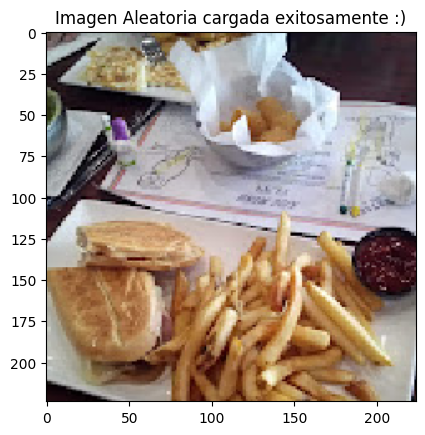

In [20]:
FOLDER = 'reviews'
files = df_sample['img_filename'].tolist()
idx =  random.randint(0, len(files))
original = load_img(f'{FOLDER}/{files[idx]}', target_size=(imgs_model_width, imgs_model_height))
plt.title("Imagen Aleatoria cargada exitosamente :)")
plt.imshow(original)
plt.show()


In [21]:
N = 0.25 * len(files)
files_sample = files[0:N]
print(len(files_sample))

2411


In [22]:
D_IE = 0 # Download Images Embeddings

In [23]:
# En una lista iremos guardando cada imagen preprocesada
if D_IE:
    all_images = []
    for f in files_sample:
        prefix = FOLDER
        filename = f'{prefix}/{f}'
        original = load_img(filename, target_size=(imgs_model_width, imgs_model_height))
        numpy_image = img_to_array(original)
        image_batch = np.expand_dims(numpy_image, axis=0)

        all_images.append(image_batch)

    images = np.vstack(all_images)

    processed_imgs = preprocess_input(images.copy()) # preprocesamos todas las imagenes
    imgs_features = feat_extractor.predict(processed_imgs)
    print("features extraidos exitosamente! :)")
    print(imgs_features.shape)
    with open('imgs_features.npy', 'wb') as file: # guardamos los embeddings
        np.save(file, imgs_features)
else:
    with open('imgs_features.npy', 'rb') as file:
        imgs_features = np.load(file)

76/76 ━━━━━━━━━━━━━━━━━━━━ 1544s 20s/step
features extraidos exitosamente! :)
(2411, 4096)


In [86]:
userset = set(df_sample['user_id'].tolist())
itemset = set(df_sample['gmap_id'].tolist())
user_to_idx = {user: idx for idx, user in enumerate(userset)}
item_to_idx = {item: idx for idx, item in enumerate(itemset)}

idx_to_user = {idx: user for user, idx in user_to_idx.items()}
idx_to_item = {idx: item for item, idx in item_to_idx.items()}


In [87]:
# Text modality configurations
VOCAB_SIZE = 5000
item_text_modality = TextModality(
    corpus=df_sample['text'].tolist(),
    id_map=item_to_idx,
    max_vocab=VOCAB_SIZE,
    tokenizer=BaseTokenizer()
)



In [88]:
# Images configurations
item_image_modality = ImageModality(
    features=imgs_features,
    ids=item_to_idx
    )

In [55]:
uir_list = df[['user_id', 'gmap_id', 'rating']].values.tolist()

In [56]:
SEED = 42
VERBOSE = True
USE_GPU = torch.cuda.is_available()


In [79]:
def by_image(row):
    gmap_id = row[1]
    sample = df_sample[df_sample['gmap_id'] == gmap_id]
    img_filename = sample['img_filename']
    if not img_filename.empty and img_filename.iloc[0] in files_sample:
        return True
    return False



uir_list_filtered = list(filter(by_image, uir_list))

In [89]:
# Ojo: el tamaño del embedding debe ser el mismo que el tamaño del set de datos.
print(len(uir_list_filtered))
print(len(imgs_features))

2411
2411


In [90]:
ratio_split = RatioSplit(
    data=uir_list_filtered,
    test_size=0.3,
    rating_threshold=3.5,
    item_text=item_text_modality, # agregamos la modalidad de texto
    item_image=item_image_modality, # agregamos la modalidad de imagen
    exclude_unknowns=False,
    seed=SEED,
    verbose=VERBOSE,
)



rating_threshold = 3.5
exclude_unknowns = False
---
Training data:
Number of users = 1645
Number of items = 1687
Number of ratings = 1687
Max rating = 5.0
Min rating = 1.0
Global mean = 4.4
---
Test data:
Number of users = 2317
Number of items = 2411
Number of ratings = 724
Number of unknown users = 672
Number of unknown items = 724
---
Total users = 2317
Total items = 2411


IndexError: index 2412 is out of bounds for axis 0 with size 2411

In [59]:
# baseline MostPopular
most_pop = cornac.models.MostPop()

# modelo CDL (Collaborative Deep Learning)
cdl = cornac.models.CDL(
    k=50, # dimension factor latente
    autoencoder_structure=[200],  # N° de neuronas de la capa code/decoder para SDAE
    vocab_size=VOCAB_SIZE, # cantidad maxima de vocabulario
    act_fn='tanh',
    max_iter=50,
    seed=SEED,
    verbose=VERBOSE
)
# modelo VBPR (Visual Bayesian Personalized Ranking)
vbpr = cornac.models.VBPR(
    k=10, # dimension de gamma en el espacio latente
    k2=40,  # dimension de theta en el espacio latente
    n_epochs=50,
    use_gpu=USE_GPU,
    seed=SEED,
    verbose=VERBOSE
)

## Metricas

In [60]:
def get_metrics(n):
    # numero de n elementos en la lista de recomendacion
    RMSE_n = cornac.metrics.RMSE()
    AUC_n = cornac.metrics.AUC()
    MAP_n = cornac.metrics.MAP()
    MRR_n = cornac.metrics.MRR()

    Recall_n = cornac.metrics.Recall(k=n)
    Precision_n = cornac.metrics.Precision(k=n)
    F1_n = cornac.metrics.FMeasure(k=n)
    nDCG_n = cornac.metrics.NDCG(k=n)
    return [RMSE_n, AUC_n, MAP_n, Recall_n, Precision_n, F1_n, nDCG_n, MRR_n]


In [ ]:
text_exp = cornac.Experiment(eval_method=ratio_split,
                             models=[most_pop, cdl, vbpr],
                             metrics=get_metrics(n=10))
text_exp.run()


[MostPop] Training started!

[MostPop] Evaluation started!


Rating:   0%|          | 0/351 [00:00<?, ?it/s]

Ranking:   0%|          | 0/331 [00:00<?, ?it/s]


[CDL] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CDL] Evaluation started!


Rating:   0%|          | 0/351 [00:00<?, ?it/s]

Ranking:   0%|          | 0/331 [00:00<?, ?it/s]


[VBPR] Training started!


Epoch 1/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 3/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 4/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 5/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 6/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 7/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 8/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 9/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 10/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 11/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 12/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 13/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 14/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 15/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 16/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 17/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 18/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 19/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 20/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 21/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 22/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 23/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 24/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 25/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 26/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 27/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 28/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 29/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 30/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 31/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 32/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 33/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 34/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 35/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 36/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 37/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 38/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 39/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 40/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 41/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 42/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 43/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 44/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 45/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 46/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 47/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 48/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 49/50:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 50/50:   0%|          | 0/9 [00:00<?, ?it/s]

Optimization finished!

[VBPR] Evaluation started!


Rating:   0%|          | 0/351 [00:00<?, ?it/s]

Ranking:   0%|          | 0/331 [00:00<?, ?it/s]


TEST:
...
        |   RMSE |    AUC |  F1@10 |    MAP |    MRR | NDCG@10 | Precision@10 | Recall@10 | Train (s) | Test (s)
------- + ------ + ------ + ------ + ------ + ------ + ------- + ------------ + --------- + --------- + --------
MostPop | 0.8329 | 0.0000 | 0.0007 | 0.0009 | 0.0046 |  0.0036 |       0.0004 |    0.0036 |    0.0011 |   0.5421
CDL     | 0.8329 | 0.0000 | 0.0007 | 0.0009 | 0.0047 |  0.0036 |       0.0004 |    0.0036 |   28.1686 |   0.6236
VBPR    | 2.3259 | 0.5249 | 0.0007 | 0.0049 | 0.0049 |  0.0014 |       0.0004 |    0.0036 |    9.7183 |   2.4580



# Fuentes:
> [1] Wang, H., Wang, N., & Yeung, D. Y. (2015, August). Collaborative deep learning for recommender systems. In Proceedings of the 21th ACM SIGKDD international conference on knowledge discovery and data mining (pp. 1235-1244).

> [2] He, R., & McAuley, J. (2016, February). VBPR: visual bayesian personalized ranking from implicit feedback. In Thirtieth AAAI Conference on Artificial Intelligence.

Links:

> (1) https://github.com/PreferredAI/tutorials/blob/master/multimodal-recsys/02_multimodality.ipynb

> (2) https://github.com/PreferredAI/tutorials/tree/master

In [ ]:
def get_reclist(id_user, model, n):
    """ funcion que retorna la lista de recomendaciones para un usuario.
    Valido solo para modelos de cornac. """
    scores_for_user = model.score(id_user)
    scores_for_user = [
        (idx_to_item[idx], score) for idx, score in enumerate(scores_for_user)
    ]
    scores_for_user.sort(key=lambda x: x[1], reverse=True)
    return [i[0] for i in scores_for_user[:n]]

In [ ]:
user_3 = random.choice(list(idx_to_user.keys()))
print("ID Usuario: ", idx_to_user[user_3])

ID Usuario:  115175780392880441681


In [ ]:
user3_reclist = get_reclist(user_3, vbpr, 10)
show_recommendations(idx_to_user[user_3], user3_reclist)

,name,description,url,categories
0,Chop House,None,https://www.google.com/maps/place//data=!4m2!3...,"Bar & grill, Restaurant"
1,India House Restaurant,Unassuming North Indian option providing tradi...,https://www.google.com/maps/place//data=!4m2!3...,Indian restaurant
2,Heritage Deli & Bakery,None,https://www.google.com/maps/place//data=!4m2!3...,"Sandwich shop, Bakery, Breakfast restaurant, C..."
3,Chipotle Mexican Grill,None,https://www.google.com/maps/place//data=!4m2!3...,"Mexican restaurant, Caterer, Fast food restaurant"
4,Apple Core,None,https://www.google.com/maps/place//data=!4m2!3...,American restaurant
5,Shinjuku Station,None,https://www.google.com/maps/place//data=!4m2!3...,Sushi restaurant
6,Maple Sugar & Vermont Spice,All-day breakfasts & homey lunch classics prep...,https://www.google.com/maps/place//data=!4m2!3...,"Breakfast restaurant, Restaurant"
7,Halvorson's,Family-run joint furnishing local beers & hear...,https://www.google.com/maps/place//data=!4m2!3...,"Bar & grill, Restaurant"
8,Curtis' All American Bar-Be-Que,Open-air roadside stop doling out pit-smoked B...,https://www.google.com/maps/place//data=!4m2!3...,"Barbecue restaurant, Restaurant"
9,242 Texas BBQ,None,https://www.google.com/maps/place//data=!4m2!3...,Barbecue restaurant


In [ ]:
user3_reclist = get_reclist(user_3, most_pop, 10)
show_recommendations(idx_to_user[user_3], user3_reclist)

,name,description,url,categories
0,Wild Roots Restaurant,None,https://www.google.com/maps/place//data=!4m2!3...,Restaurant
1,Northeast Kingdom Country Store,None,https://www.google.com/maps/place//data=!4m2!3...,"Pizza restaurant, Antique store, Bakery, Beer ..."
2,Eaton's Sugar House,None,https://www.google.com/maps/place//data=!4m2!3...,"Breakfast restaurant, Gift shop"
3,Leonardo's Pizza,Local pizzeria chain offering classic & gourme...,https://www.google.com/maps/place//data=!4m2!3...,"Pizza restaurant, Delivery Restaurant"
4,Mildred's Grill,None,https://www.google.com/maps/place//data=!4m2!3...,"New American restaurant, American restaurant, ..."
5,Sakura Sushi & Kitchen,Unassuming counter-service place in a strip ma...,https://www.google.com/maps/place//data=!4m2!3...,"Japanese restaurant, Asian restaurant, Sushi r..."
6,Moe's Southwest Grill,Counter-serve chain dishing up Southwestern st...,https://www.google.com/maps/place//data=!4m2!3...,"Mexican restaurant, Burrito restaurant, Restau..."
7,Three Brothers Pizza and Grill,Quick-serve pizza & sandwich counter in an ex-...,https://www.google.com/maps/place//data=!4m2!3...,"Pizza restaurant, Caterer, Italian restaurant,..."
8,Papa Pete's Home of the Giant Pancakes,"Jumbo pancakes, omelets & burgers are provided...",https://www.google.com/maps/place//data=!4m2!3...,"Diner, Breakfast restaurant, Hamburger restaurant"
9,Pizza Hut,Family-friendly chain known for its made-to-or...,https://www.google.com/maps/place//data=!4m2!3...,"Pizza delivery, Chicken wings restaurant, Take..."


In [ ]:
user3_reclist = get_reclist(user_3, cdl, 10)
show_recommendations(idx_to_user[user_3], user3_reclist)

,name,description,url,categories
0,Subway,Casual counter-serve chain for build-your-own ...,https://www.google.com/maps/place//data=!4m2!3...,"Sandwich shop, Caterer, Fast food restaurant, ..."
1,O'Dwyer's Public House,None,https://www.google.com/maps/place//data=!4m2!3...,"Restaurant, Bar"
2,Starbucks,Seattle-based coffeehouse chain known for its ...,https://www.google.com/maps/place//data=!4m2!3...,"Coffee shop, Breakfast restaurant, Cafe, Coffe..."
3,The Garden Market,None,https://www.google.com/maps/place//data=!4m2!3...,Restaurant
4,Chelsea Station,None,https://www.google.com/maps/place//data=!4m2!3...,American restaurant
5,Cantina Di Gerardo,None,https://www.google.com/maps/place//data=!4m2!3...,"Italian restaurant, Lunch restaurant"
6,Wendy's,Fast-food burger chain serving sides such as c...,https://www.google.com/maps/place//data=!4m2!3...,"Fast food restaurant, Hamburger restaurant, Re..."
7,Olive Garden Italian Restaurant,"Lively, family-friendly chain featuring Italia...",https://www.google.com/maps/place//data=!4m2!3...,"Italian restaurant, Caterer, Family restaurant..."
8,Curtis' All American Bar-Be-Que,Open-air roadside stop doling out pit-smoked B...,https://www.google.com/maps/place//data=!4m2!3...,"Barbecue restaurant, Restaurant"
9,Koto Japanese Restaurant,Bustling option for flaming hibachi-grill thea...,https://www.google.com/maps/place//data=!4m2!3...,"Japanese restaurant, Asian restaurant, Bar, Re..."
